In [1]:
from PIL import Image

In [2]:
def mean(img, pos=tuple()):
    around = 0
    for c in [0, 1, 2]:
        around += \
            img.getpixel((pos[0]-1, pos[1]-1))[c] + \
            img.getpixel((pos[0], pos[1]-1))[c] + \
            img.getpixel((pos[0]+1, pos[1]-1))[c] + \
            img.getpixel((pos[0]-1, pos[1]))[c] + \
            img.getpixel((pos[0]+1, pos[1]))[c] + \
            img.getpixel((pos[0]-1, pos[1]+1))[c] + \
            img.getpixel((pos[0], pos[1]+1))[c] + \
            img.getpixel((pos[0]+1, pos[1]+1))[c]
    return around/24.0

In [65]:
grad = Image.open('grad.png')
mean(grad, (247, 247))

211.625

In [18]:
def diff(img, pos=tuple()):
    current = 0
    for c in [0,1,2]:
        current += img.getpixel((pos[0], pos[1]))[c]
    return current/3 - mean(img,(pos[0], pos[1]))

In [19]:
diff(grad, (247, 247))

10.375

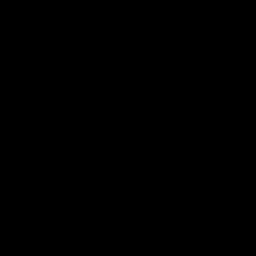

In [35]:
new = Image.new('RGB', grad.size)
new

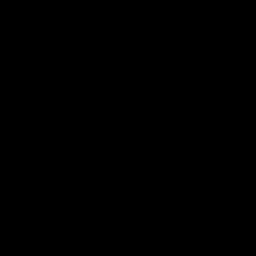

In [55]:
def blur(img):
    blurred = Image.new('RGB', img.size)
    for x in range(1, img.size[0]-1):
        for y in range(1, img.size[1]-1):
            (r, g, b) = img.getpixel((x, y))[:3]
            change = int(diff(img, (x, y)) / 2.)
            blurred.putpixel((x, y), (r+change, g+change, b+change))
    return blurred

new

In [56]:
def invert(image):
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            (r, g, b) = image.getpixel((x, y))
            image.putpixel((x, y), (255-r, 255-g, 255-b))

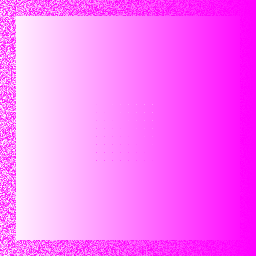

In [67]:
invert(grad)
grad

In [61]:
def monochrome(image):
    blur(image)
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            g = image.getpixel((x,y))[1]
            image.putpixel((x, y), (0, g, 0))
    return image

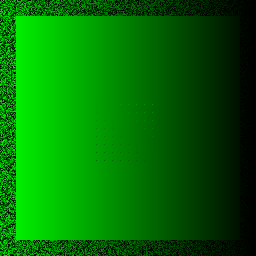

In [68]:
mono = monochrome(grad)
mono

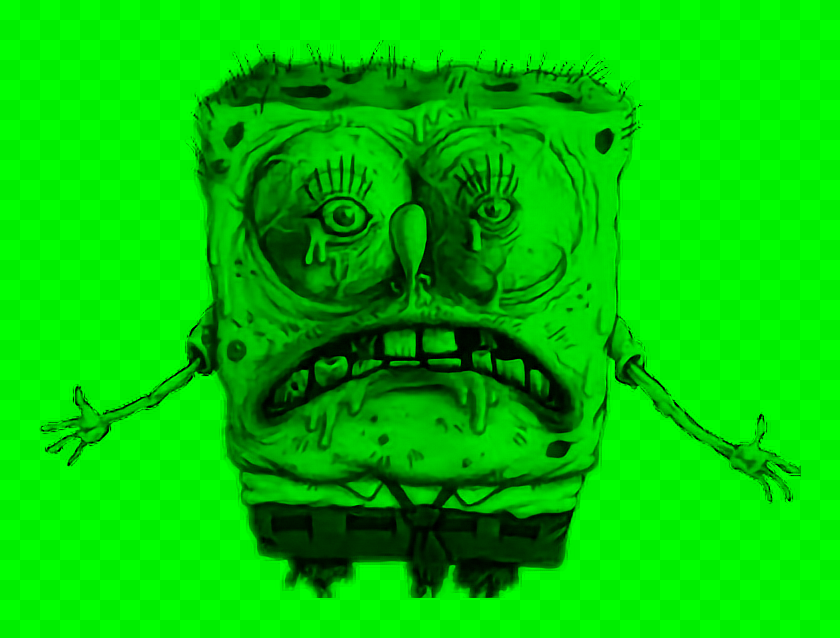

In [63]:
mono = monochrome(Image.open('spongebob.png'))
mono

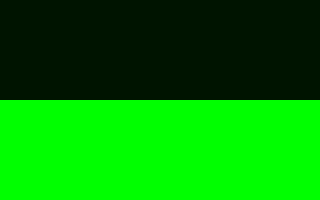

In [64]:
monopol = monochrome(Image.open('akslop.png'))
monopol

In [71]:
import glob

def old_skool(image):
    blur(image)
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            g = image.getpixel((x,y))[1]
            image.putpixel((x, y), (0, g, 0))
    return image

img_list = glob.glob('*.png')
for fn, i in zip(img_list,range(len(img_list))):
    current = Image.open(fn)
    current = old_skool(current)
    current.save(f"{fn.split('.')[0]}-crt.png")